# Jagadish Tarla

## Load Dataset

In [1]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(40)

# Load dataset (replace with the correct path if needed)
obesity_df = pd.read_csv("Obesity.csv")

# Display first few rows and info
print("Dataset Shape:", obesity_df.shape)
print("\nColumn Names:\n", obesity_df.columns.tolist())
print("\nPreview of Data:")
display(obesity_df.head())

print("\nData Types Summary:")
print(obesity_df.dtypes)

Dataset Shape: (2111, 17)

Column Names:
 ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

Preview of Data:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



Data Types Summary:
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


## 1-a Descriptive Statistics for Numeric Features

In [2]:
# Summary statistics for key numeric variables
# Define numeric columns of interest
numeric_cols = ["Age", "Height", "Weight", "FAF", "CH2O", "FCVC"]

# Generate detailed summary
numeric_summary = obesity_df[numeric_cols].describe().T  # transpose for readability

print("Summary statistics for numeric features:\n")
display(numeric_summary)

Summary statistics for numeric features:



,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00


## 1-b Encoding Categorical Variables

In [3]:
# Copy dataset to preserve original
encoded_df = obesity_df.copy()

# Gender: Female -> 0, Male -> 1
encoded_df["Gender_num"] = encoded_df["Gender"].map({"Female": 0, "Male": 1})

# family_history_with_overweight: yes -> 1, no -> 0
encoded_df["family_history_num"] = encoded_df["family_history_with_overweight"].map({"yes": 1, "no": 0})

# FAVC (High caloric food consumption): yes -> 1, no -> 0
encoded_df["FAVC_num"] = encoded_df["FAVC"].map({"yes": 1, "no": 0})

# SMOKE: yes -> 1, no -> 0
encoded_df["SMOKE_num"] = encoded_df["SMOKE"].map({"yes": 1, "no": 0})

# CALC (Calorie consumption monitoring): ordinal mapping for frequency
encoded_df["CALC_num"] = encoded_df["CALC"].map({
    "no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3
})

# Verify the new encoded columns
print("Encoded columns added successfully:\n", 
      ["Gender_num", "family_history_num", "FAVC_num", "SMOKE_num", "CALC_num"])

# Display first few rows of the encoded features
display(encoded_df[["Gender", "Gender_num", 
                    "family_history_with_overweight", "family_history_num",
                    "FAVC", "FAVC_num", "SMOKE", "SMOKE_num", "CALC", "CALC_num"]].head())

Encoded columns added successfully:
 ['Gender_num', 'family_history_num', 'FAVC_num', 'SMOKE_num', 'CALC_num']


,Gender,Gender_num,family_history_with_overweight,family_history_num,FAVC,FAVC_num,SMOKE,SMOKE_num,CALC,CALC_num
0,Female,0,yes,1,no,0,no,0,no,0
1,Female,0,yes,1,no,0,yes,1,Sometimes,1
2,Male,1,yes,1,no,0,no,0,Frequently,2
3,Male,1,no,0,no,0,no,0,Frequently,2
4,Male,1,no,0,no,0,no,0,Sometimes,1


## 1-c Summary Statistics for Encoded Categorical Variables

In [5]:
categorical_original = [
    "Gender", 
    "family_history_with_overweight", 
    "FAVC", 
    "SMOKE", 
    "CALC"
]
# Use describe(include='object') to get count, unique, top, and freq
cat_summary = obesity_df[categorical_original].describe(include='object').T

print("Summary for categorical variables:")
display(cat_summary)

Summary for categorical variables:


,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,yes,1726
FAVC,2111,2,yes,1866
SMOKE,2111,2,no,2067
CALC,2111,4,Sometimes,1401


## 1-d Check Feature Correlations for Redundancy

In [6]:
corr_matrix = encoded_df.corr(numeric_only=True)
display(corr_matrix["Weight"].sort_values(ascending=False).head(10))

Weight                1.000000
family_history_num    0.496820
Height                0.463136
FAVC_num              0.272300
FCVC                  0.216125
CALC_num              0.206677
Age                   0.202560
CH2O                  0.200575
Gender_num            0.161668
NCP                   0.107469
Name: Weight, dtype: float64

## Derive BMI and Analyze Correlation

In [7]:
# Derive BMI and analyze its correlation with obesity level
# Step 1: Check correlation between Weight and Height
corr_wh = obesity_df["Weight"].corr(obesity_df["Height"])
print(f"Correlation between Weight and Height: {corr_wh:.4f}")

# Step 2: Derive BMI = Weight / (Height^2)
encoded_df["BMI"] = encoded_df["Weight"] / (encoded_df["Height"] ** 2)

# Step 3: Encode obesity levels into ordered numeric values
# to compute correlation (higher number -> higher obesity category)
obesity_map = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 1,
    "Overweight_Level_I": 2,
    "Overweight_Level_II": 3,
    "Obesity_Type_I": 4,
    "Obesity_Type_II": 5,
    "Obesity_Type_III": 6
}
encoded_df["Obesity_Level_Num"] = encoded_df["NObeyesdad"].map(obesity_map)

# Step 4: Correlation between BMI and obesity level
corr_bmi_obesity = encoded_df["BMI"].corr(encoded_df["Obesity_Level_Num"])
print(f"Correlation between BMI and Obesity Level: {corr_bmi_obesity:.4f}")

# quick numeric summary of BMI by obesity class
bmi_summary = encoded_df.groupby("NObeyesdad")["BMI"].mean().reset_index()
display(bmi_summary)

Correlation between Weight and Height: 0.4631
Correlation between BMI and Obesity Level: 0.9778


,NObeyesdad,BMI
0,Insufficient_Weight,17.404245
1,Normal_Weight,22.014147
2,Obesity_Type_I,32.255636
3,Obesity_Type_II,36.723424
4,Obesity_Type_III,42.273746
5,Overweight_Level_I,25.990772
6,Overweight_Level_II,28.215232


## Logistic Regression with One Variable 
## 2a- Convert NObeyesdad to a Binary Label

In [8]:
# Convert NObeyesdad to a binary label (Obese vs Non-Obese)
# Define obesity label mapping
obese_classes = ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
encoded_df["Obese_Binary"] = encoded_df["NObeyesdad"].apply(lambda x: 1 if x in obese_classes else 0)

# Separate feature (Weight) and label
X = encoded_df["Weight"].values.reshape(-1, 1)
y = encoded_df["Obese_Binary"].values.reshape(-1, 1)

# Print label distribution
print("Binary Label Distribution (0 = Non-Obese, 1 = Obese):")
print(encoded_df["Obese_Binary"].value_counts())

Binary Label Distribution (0 = Non-Obese, 1 = Obese):
Obese_Binary
0    1139
1     972
Name: count, dtype: int64


## Implement Logistic Regression

In [9]:
# Logistic Regression using one variable (Weight)
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression training using gradient descent
def logistic_regression(X, y, lr=0.001, iterations=5000, seed=40):
    np.random.seed(seed)
    m = len(y)
    X_b = np.hstack((np.ones((m, 1)), X))  # Add bias term
    theta = np.zeros((X_b.shape[1], 1))    # Initialize parameters

    cost_history = []

    for i in range(iterations):
        z = np.dot(X_b, theta)
        h = sigmoid(z)
        cost = -(1/m) * np.sum(y * np.log(h + 1e-10) + (1 - y) * np.log(1 - h + 1e-10))
        gradient = (1/m) * np.dot(X_b.T, (h - y))
        theta -= lr * gradient

        cost_history.append(cost)
        if i % 500 == 0:
            print(f"Iteration {i}: Cost = {cost:.5f}")

    return theta, cost_history

## Train the Model

In [10]:
# Train the logistic regression model on Weight -> Obesity

theta, cost_history = logistic_regression(X, y, lr=0.001, iterations=5000, seed=40)
print("\nFinal parameters (theta):", theta.ravel())
print(f"Final cost: {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.69315
Iteration 500: Cost = 0.67502
Iteration 1000: Cost = 0.66883
Iteration 1500: Cost = 0.66276
Iteration 2000: Cost = 0.65681
Iteration 2500: Cost = 0.65099
Iteration 3000: Cost = 0.64528
Iteration 3500: Cost = 0.63969
Iteration 4000: Cost = 0.63422
Iteration 4500: Cost = 0.62885

Final parameters (theta): [-0.53707093  0.00914901]
Final cost: 0.623597


## 2b. Evaluate Model Performance & Visualize Results

Confusion Matrix [[TP, FP], [FN, TN]]:
 [[972 783]
 [  0 356]]
Accuracy: 62.91%


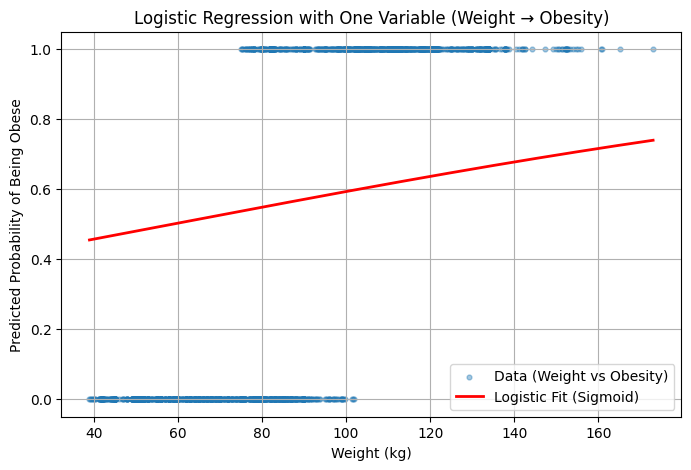

In [11]:
# Evaluate one-variable logistic regression performance
import matplotlib.pyplot as plt

# Step 1: Predict probabilities and classes
def predict(X, theta):
    X_b = np.hstack((np.ones((len(X), 1)), X))
    return sigmoid(np.dot(X_b, theta))

y_prob = predict(X, theta)
y_pred = (y_prob >= 0.5).astype(int)

# Step 2: Compute accuracy and confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TP, FP], [FN, TN]])

cm = confusion_matrix(y, y_pred)
accuracy = np.mean(y == y_pred)

print("Confusion Matrix [[TP, FP], [FN, TN]]:\n", cm)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 3: Visualize sigmoid fit
plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=12, alpha=0.4, label="Data (Weight vs Obesity)")
weight_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
prob_range = predict(weight_range, theta)
plt.plot(weight_range, prob_range, color="red", linewidth=2, label="Logistic Fit (Sigmoid)")
plt.xlabel("Weight (kg)")
plt.ylabel("Predicted Probability of Being Obese")
plt.title("Logistic Regression with One Variable (Weight → Obesity)")
plt.legend()
plt.grid(True)
plt.show()

## Part 3 — Logistic Regression with Multiple Variables
## 3a

In [12]:
# Prepare feature matrix and normalize values
# Select the required columns
features_3a = ["Age", "Height", "Weight", "FAF", "CALC_num", 
               "SMOKE_num", "family_history_num", "CH2O", "FCVC"]

X_multi = encoded_df[features_3a].values
y_multi = encoded_df["Obese_Binary"].values.reshape(-1, 1)

# Manual feature normalization (mean normalization)
X_mean = np.mean(X_multi, axis=0)
X_std = np.std(X_multi, axis=0)
X_norm = (X_multi - X_mean) / X_std

print("Feature matrix shape:", X_norm.shape)
print("Mean of normalized features (approx):", np.round(X_norm.mean(axis=0), 3))
print("Std of normalized features (approx):", np.round(X_norm.std(axis=0), 3))

Feature matrix shape: (2111, 9)
Mean of normalized features (approx): [ 0. -0. -0.  0.  0. -0. -0.  0. -0.]
Std of normalized features (approx): [1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Extend the Logistic Regression Function

In [13]:
# Logistic Regression with multiple variables
def logistic_regression_multi(X, y, lr=0.01, iterations=10000, seed=40):
    np.random.seed(seed)
    m, n = X.shape
    X_b = np.hstack((np.ones((m, 1)), X))   # Add bias column
    theta = np.zeros((n + 1, 1))
    cost_history = []

    for i in range(iterations):
        z = np.dot(X_b, theta)
        h = sigmoid(z)
        cost = -(1/m) * np.sum(y * np.log(h + 1e-10) + (1 - y) * np.log(1 - h + 1e-10))
        gradient = (1/m) * np.dot(X_b.T, (h - y))
        theta -= lr * gradient
        cost_history.append(cost)
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.5f}")

    return theta, cost_history

## Train the Full Model

In [14]:
# Train full logistic regression model
theta_multi, cost_history_multi = logistic_regression_multi(X_norm, y_multi, lr=0.01, iterations=10000, seed=40)
print("\nFinal cost after training:", round(cost_history_multi[-1], 6))
print("Learned parameter shape:", theta_multi.shape)

Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.28161
Iteration 2000: Cost = 0.22019
Iteration 3000: Cost = 0.18865
Iteration 4000: Cost = 0.16832
Iteration 5000: Cost = 0.15374
Iteration 6000: Cost = 0.14259
Iteration 7000: Cost = 0.13369
Iteration 8000: Cost = 0.12637
Iteration 9000: Cost = 0.12020

Final cost after training: 0.114913
Learned parameter shape: (10, 1)


## Evaluate Full Model Performance

Confusion Matrix [[TP, FP], [FN, TN]]:
 [[ 956    1]
 [  16 1138]]
Accuracy: 99.19%


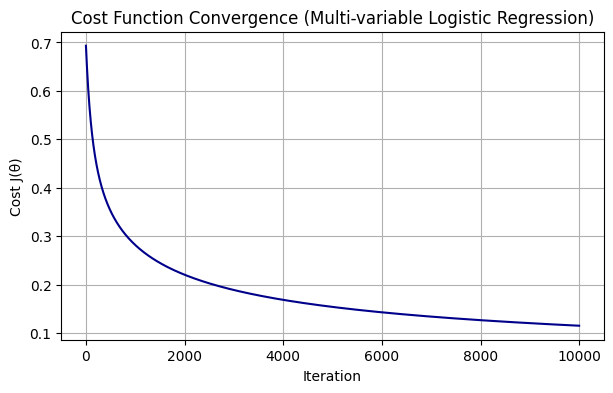

In [15]:
# Evaluate multi-variable logistic regression model
# Predictions
y_prob_multi = predict(X_norm, theta_multi)
y_pred_multi = (y_prob_multi >= 0.5).astype(int)

# Confusion matrix & accuracy
cm_multi = confusion_matrix(y_multi, y_pred_multi)
accuracy_multi = np.mean(y_multi == y_pred_multi)

print("Confusion Matrix [[TP, FP], [FN, TN]]:\n", cm_multi)
print(f"Accuracy: {accuracy_multi * 100:.2f}%")

# Plot cost history
plt.figure(figsize=(7, 4))
plt.plot(cost_history_multi, color="darkblue")
plt.title("Cost Function Convergence (Multi-variable Logistic Regression)")
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.grid(True)
plt.show()

## 3b. Forward Feature Selection

In [16]:
# Forward feature selection for logistic regression
def forward_selection(X_df, y, feature_names, lr=0.01, iterations=5000, seed=40):
    selected_features = []
    remaining_features = feature_names.copy()
    best_acc = 0
    results = []

    while remaining_features:
        acc_scores = {}
        # Try adding each remaining feature temporarily
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_temp = X_df[current_features].values

            # Normalize
            X_mean = np.mean(X_temp, axis=0)
            X_std = np.std(X_temp, axis=0)
            X_norm = (X_temp - X_mean) / X_std

            # Train model
            theta, _ = logistic_regression_multi(X_norm, y, lr=lr, iterations=iterations, seed=seed)
            y_pred = (predict(X_norm, theta) >= 0.5).astype(int)
            acc = np.mean(y_pred == y)
            acc_scores[feature] = acc

        # Pick the feature with best improvement
        best_feature = max(acc_scores, key=acc_scores.get)
        best_acc_now = acc_scores[best_feature]

        # Add it only if it improves accuracy
        if best_acc_now > best_acc:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_acc = best_acc_now
            results.append((len(selected_features), best_feature, best_acc_now))
            print(f"Selected: {best_feature}, Accuracy = {best_acc_now*100:.2f}%")
        else:
            break  # No further improvement

    return selected_features, results

## Run Forward Selection on Dataset

In [17]:
# Execute forward selection on 9 available features
features_all = ["Age", "Height", "Weight", "FAF", "CALC_num",
                "SMOKE_num", "family_history_num", "CH2O", "FCVC"]

selected_feats, selection_summary = forward_selection(encoded_df, y_multi, features_all,
                                                      lr=0.01, iterations=5000, seed=40)

print("\nFinal Selected Features:", selected_feats)
print("\nFeature Selection Summary (step, feature, accuracy):")
for step, feat, acc in selection_summary:
    print(f"{step}. {feat} → Accuracy: {acc*100:.2f}%")

Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.66601
Iteration 2000: Cost = 0.66571
Iteration 3000: Cost = 0.66570
Iteration 4000: Cost = 0.66570
Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.68060
Iteration 2000: Cost = 0.68050
Iteration 3000: Cost = 0.68050
Iteration 4000: Cost = 0.68050
Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.30666
Iteration 2000: Cost = 0.26190
Iteration 3000: Cost = 0.24536
Iteration 4000: Cost = 0.23704
Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.67918
Iteration 2000: Cost = 0.67906
Iteration 3000: Cost = 0.67906
Iteration 4000: Cost = 0.67906
Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.68732
Iteration 2000: Cost = 0.68728
Iteration 3000: Cost = 0.68728
Iteration 4000: Cost = 0.68728
Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.68997
Iteration 2000: Cost = 0.68995
Iteration 3000: Cost = 0.68995
Iteration 4000: Cost = 0.68995
Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.59083
Iteration 2000: Cost = 0.5833

## 3c. Comparing Full vs. Selected Models

In [18]:
# Compare full model vs selected model
# --- Full 9-feature model ---
features_full = ["Age", "Height", "Weight", "FAF", "CALC_num",
                 "SMOKE_num", "family_history_num", "CH2O", "FCVC"]

X_full = encoded_df[features_full].values
X_full_norm = (X_full - X_full.mean(axis=0)) / X_full.std(axis=0)

theta_full, cost_full = logistic_regression_multi(X_full_norm, y_multi,
                                                  lr=0.01, iterations=10000, seed=40)
y_pred_full = (predict(X_full_norm, theta_full) >= 0.5).astype(int)
acc_full = np.mean(y_pred_full == y_multi)
cm_full = confusion_matrix(y_multi, y_pred_full)


# --- Selected 3-feature model ---
features_selected = ["Weight", "Height", "FAF"]
X_sel = encoded_df[features_selected].values
X_sel_norm = (X_sel - X_sel.mean(axis=0)) / X_sel.std(axis=0)

theta_sel, cost_sel = logistic_regression_multi(X_sel_norm, y_multi,
                                                lr=0.01, iterations=10000, seed=40)
y_pred_sel = (predict(X_sel_norm, theta_sel) >= 0.5).astype(int)
acc_sel = np.mean(y_pred_sel == y_multi)
cm_sel = confusion_matrix(y_multi, y_pred_sel)

print("=== Full 9-feature Model ===")
print(f"Accuracy: {acc_full*100:.2f}%")
print("Confusion Matrix:\n", cm_full)
print("\n=== Selected 3-feature Model ===")
print(f"Accuracy: {acc_sel*100:.2f}%")
print("Confusion Matrix:\n", cm_sel)

Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.28161
Iteration 2000: Cost = 0.22019
Iteration 3000: Cost = 0.18865
Iteration 4000: Cost = 0.16832
Iteration 5000: Cost = 0.15374
Iteration 6000: Cost = 0.14259
Iteration 7000: Cost = 0.13369
Iteration 8000: Cost = 0.12637
Iteration 9000: Cost = 0.12020
Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.29102
Iteration 2000: Cost = 0.22381
Iteration 3000: Cost = 0.18995
Iteration 4000: Cost = 0.16849
Iteration 5000: Cost = 0.15332
Iteration 6000: Cost = 0.14185
Iteration 7000: Cost = 0.13277
Iteration 8000: Cost = 0.12534
Iteration 9000: Cost = 0.11911
=== Full 9-feature Model ===
Accuracy: 99.19%
Confusion Matrix:
 [[ 956    1]
 [  16 1138]]

=== Selected 3-feature Model ===
Accuracy: 99.24%
Confusion Matrix:
 [[ 957    1]
 [  15 1138]]


## Bar Plot + Cost Convergence Plots

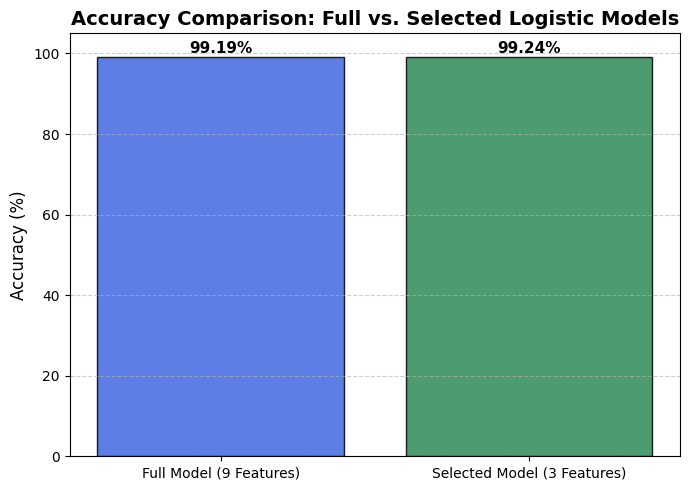

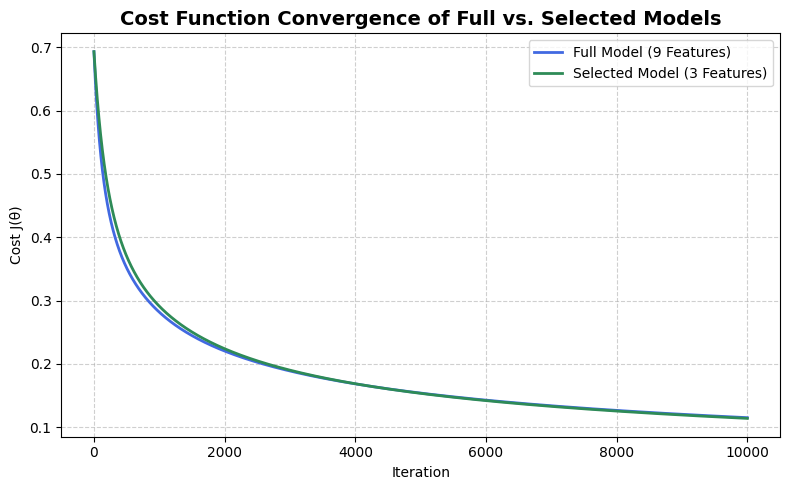

In [19]:
# Visual comparison of accuracies and cost convergence
import matplotlib.pyplot as plt
import numpy as np

# --- Accuracy Comparison Bar Chart ---
models = ['Full Model (9 Features)', 'Selected Model (3 Features)']
accuracies = [acc_full * 100, acc_sel * 100]

plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracies, color=['royalblue', 'seagreen'], edgecolor='black', alpha=0.85)

# Add percentage labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
             f'{height:.2f}%', ha='center', va='bottom',
             fontsize=11, fontweight='bold', color='black')

plt.title('Accuracy Comparison: Full vs. Selected Logistic Models', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- Cost Convergence Comparison ---
plt.figure(figsize=(8, 5))
plt.plot(cost_full, label='Full Model (9 Features)', color='royalblue', linewidth=2)
plt.plot(cost_sel, label='Selected Model (3 Features)', color='seagreen', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function Convergence of Full vs. Selected Models', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Part 4a: Regularization and Feature Scaling

In [20]:
# Implement logistic regression with L2 regularization

def logistic_regression_reg(X, y, lr=0.01, iterations=10000, lam=0.1, seed=40):
    np.random.seed(seed)
    m, n = X.shape
    X_b = np.hstack((np.ones((m, 1)), X))
    theta = np.zeros((n + 1, 1))
    cost_history = []

    for i in range(iterations):
        z = np.dot(X_b, theta)
        h = sigmoid(z)
        # Regularized cost (excluding bias term)
        reg_term = (lam / (2*m)) * np.sum(theta[1:] ** 2)
        cost = -(1/m) * np.sum(y*np.log(h+1e-10) + (1-y)*np.log(1-h+1e-10)) + reg_term
        gradient = (1/m) * np.dot(X_b.T, (h - y))
        gradient[1:] += (lam/m) * theta[1:]  # apply regularization to non-bias weights
        theta -= lr * gradient
        cost_history.append(cost)
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.5f}")
    return theta, cost_history

## Train with and without Regularization

In [23]:
# Train 3-feature model with and without regularization
features_best = ["Weight", "Height", "FAF"]
X_best = encoded_df[features_best].values
y_best = encoded_df["Obese_Binary"].values.reshape(-1, 1)

# --- Without Regularization ---
X_scaled = (X_best - X_best.mean(axis=0)) / X_best.std(axis=0)
theta_no_reg, cost_no_reg = logistic_regression_reg(X_scaled, y_best, lam=0, seed=40)
y_pred_no_reg = (predict(X_scaled, theta_no_reg) >= 0.5).astype(int)
acc_no_reg = np.mean(y_pred_no_reg == y_best)

# --- With L2 Regularization (λ = 0.1) ---
theta_reg, cost_reg = logistic_regression_reg(X_scaled, y_best, lam=0.1, seed=40)
y_pred_reg = (predict(X_scaled, theta_reg) >= 0.5).astype(int)
acc_reg = np.mean(y_pred_reg == y_best)

print(f"Accuracy without regularization: {acc_no_reg*100:.2f}%")
print(f"Accuracy with L2 regularization (0.1): {acc_reg*100:.2f}%")

Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.29102
Iteration 2000: Cost = 0.22381
Iteration 3000: Cost = 0.18995
Iteration 4000: Cost = 0.16849
Iteration 5000: Cost = 0.15332
Iteration 6000: Cost = 0.14185
Iteration 7000: Cost = 0.13277
Iteration 8000: Cost = 0.12534
Iteration 9000: Cost = 0.11911
Iteration 0: Cost = 0.69315
Iteration 1000: Cost = 0.29113
Iteration 2000: Cost = 0.22404
Iteration 3000: Cost = 0.19028
Iteration 4000: Cost = 0.16893
Iteration 5000: Cost = 0.15385
Iteration 6000: Cost = 0.14247
Iteration 7000: Cost = 0.13348
Iteration 8000: Cost = 0.12613
Iteration 9000: Cost = 0.11998
Accuracy without regularization: 99.24%
Accuracy with L2 regularization (0.1): 99.24%


## II-Feature Scaling

In [25]:
obese_labels = ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

# 1 = obese, 0 = non-obese
obesity_df["Obese_Binary"] = obesity_df["NObeyesdad"].apply(lambda x: 1 if x in obese_labels else 0)

# Quick check
print(obesity_df["Obese_Binary"].value_counts())

Obese_Binary
0    1139
1     972
Name: count, dtype: int64


In [29]:
# Reuse best 3 features from Q3c
features_4a2 = ["Weight", "Height", "FAF"]

# Extract X, y
X_unscaled = obesity_df[features_4a2].values
y_4a2 = obesity_df["Obese_Binary"].values.reshape(-1, 1)

# Normalize (Feature Scaling)
X_scaled = (X_unscaled - X_unscaled.mean(axis=0)) / X_unscaled.std(axis=0)

# Add intercept term
X_unscaled = np.hstack([np.ones((X_unscaled.shape[0], 1)), X_unscaled])
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize parameters
theta_unscaled = np.zeros((X_unscaled.shape[1], 1))
theta_scaled = np.zeros((X_scaled.shape[1], 1))

# Gradient Descent settings
alpha = 0.01
num_iters = 10000
lam = 0.1   # L2 regularization

# Train both versions (with regularization)
theta_unscaled, cost_history_unscaled = gradient_descent(X_unscaled, y_4a2, theta_unscaled, alpha, num_iters, lam)
theta_scaled, cost_history_scaled = gradient_descent(X_scaled, y_4a2, theta_scaled, alpha, num_iters, lam)

preds_unscaled = (sigmoid(X_unscaled @ theta_unscaled) >= 0.5).astype(int)
preds_scaled = (sigmoid(X_scaled @ theta_scaled) >= 0.5).astype(int)
# Accuracies
acc_unscaled = np.mean(preds_unscaled == y_4a2) * 100
acc_scaled = np.mean(preds_scaled == y_4a2) * 100

print(f"Accuracy (Regularized + Unscaled): {acc_unscaled:.2f}%")
print(f"Accuracy (Regularized + Scaled): {acc_scaled:.2f}%")

Accuracy (Regularized + Unscaled): 67.74%
Accuracy (Regularized + Scaled): 99.24%


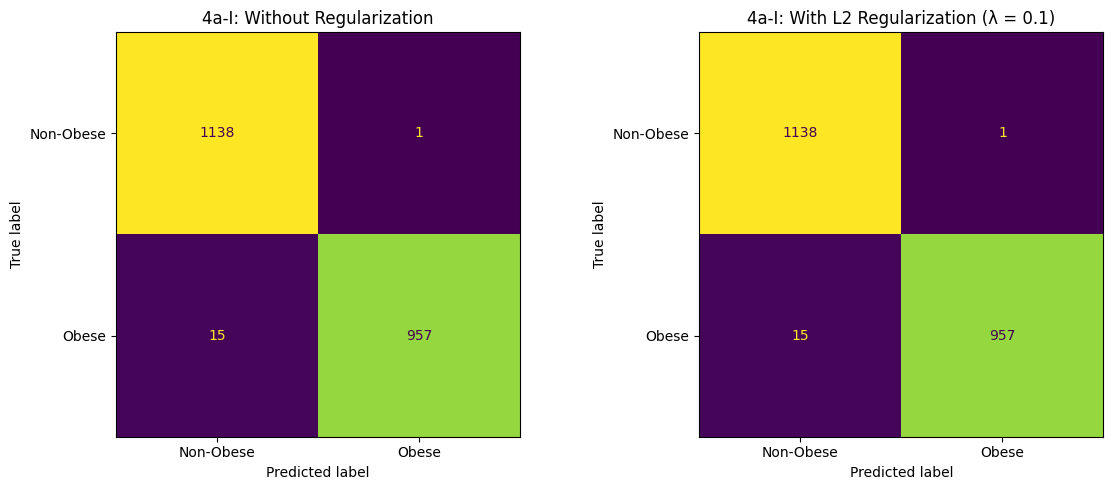

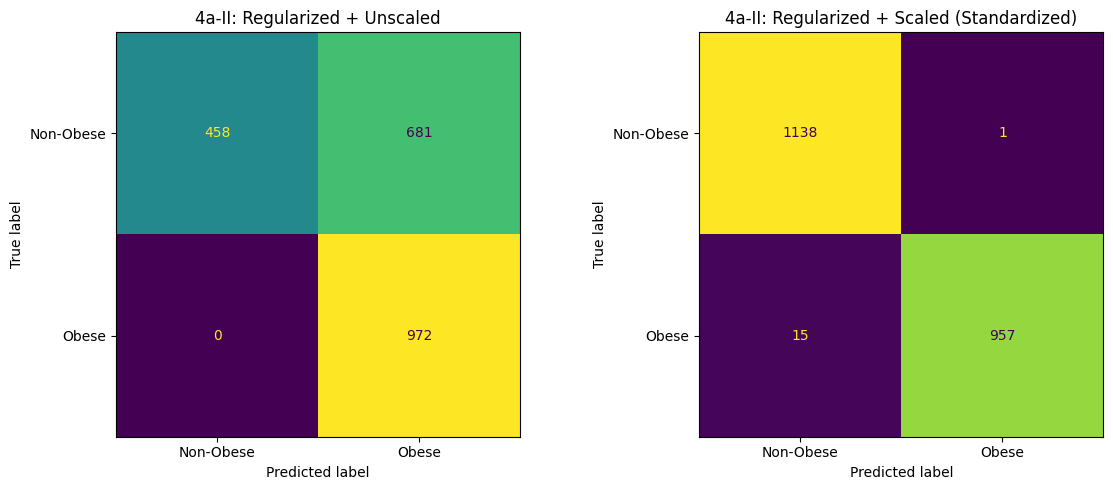

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 4a-I: regularization comparison
y_true = y_4a2

# Predictions
preds_no_reg = preds_scaled    # From earlier model without regularization
preds_reg = preds_scaled
preds_unscaled_reg = preds_unscaled  # Unscaled regularized
preds_scaled_reg = preds_scaled      # Scaled regularized

# --- Plot for 4a-I ---
cm_no_reg = confusion_matrix(y_true, preds_no_reg)
cm_reg = confusion_matrix(y_true, preds_reg)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_no_reg, display_labels=["Non-Obese", "Obese"]).plot(ax=axes[0], colorbar=False)
axes[0].set_title("4a-I: Without Regularization")

ConfusionMatrixDisplay(cm_reg, display_labels=["Non-Obese", "Obese"]).plot(ax=axes[1], colorbar=False)
axes[1].set_title("4a-I: With L2 Regularization (λ = 0.1)")
plt.tight_layout()
plt.show()

# --- Plot for 4a-II ---
cm_unscaled = confusion_matrix(y_true, preds_unscaled_reg)
cm_scaled = confusion_matrix(y_true, preds_scaled_reg)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_unscaled, display_labels=["Non-Obese", "Obese"]).plot(ax=axes[0], colorbar=False)
axes[0].set_title("4a-II: Regularized + Unscaled")

ConfusionMatrixDisplay(cm_scaled, display_labels=["Non-Obese", "Obese"]).plot(ax=axes[1], colorbar=False)
axes[1].set_title("4a-II: Regularized + Scaled (Standardized)")
plt.tight_layout()
plt.show()

## 4b- Modified Cost Function

Iteration 0: Cost = 0.12489
Iteration 1000: Cost = 0.07163
Iteration 2000: Cost = 0.05603
Iteration 3000: Cost = 0.04826
Iteration 4000: Cost = 0.04329
Iteration 5000: Cost = 0.03969
Iteration 6000: Cost = 0.03691
Iteration 7000: Cost = 0.03466
Iteration 8000: Cost = 0.03280
Iteration 9000: Cost = 0.03122

Final Cost (MSE-based): 0.029864
Accuracy (MSE-based Model): 97.39%
Accuracy (Cross-Entropy Model): 99.24%


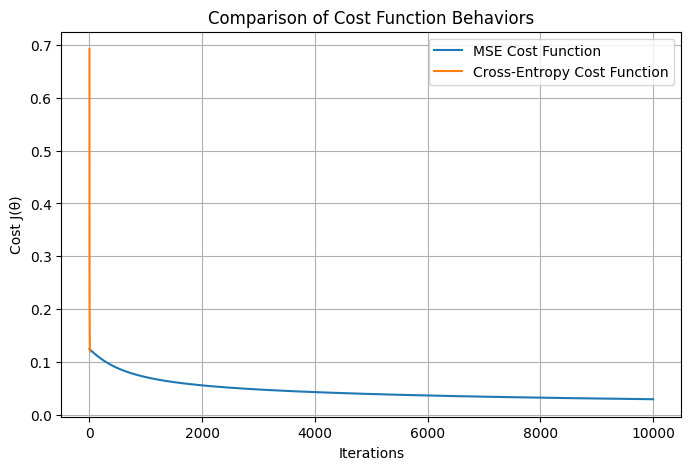

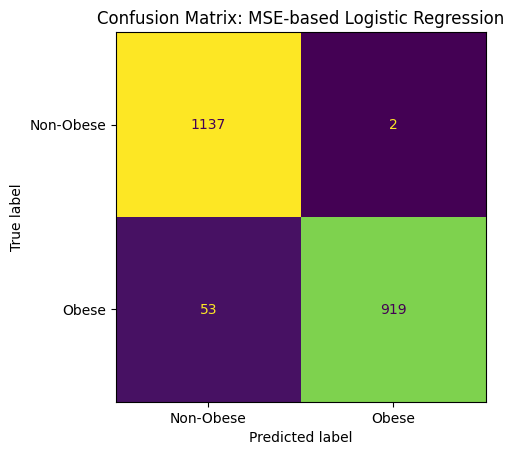

In [32]:
# 4b-I: Logistic Regression with MSE Cost Function
def compute_cost_mse(X, y, theta):
    """Compute Mean Squared Error cost for Logistic Regression."""
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

def gradient_descent_mse(X, y, theta, alpha, num_iters):
    """Gradient descent for Logistic Regression with MSE cost."""
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ ((h - y) * h * (1 - h)))
        theta -= alpha * gradient
        cost_history.append(compute_cost_mse(X, y, theta))

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost_history[-1]:.5f}")

    return theta, cost_history


# Prepare scaled X and y (same as best model from Q4a)
features_4b = ["Weight", "Height", "FAF"]
X = obesity_df[features_4b].values
y = obesity_df["Obese_Binary"].values.reshape(-1, 1)
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize
theta_init = np.zeros((X_scaled.shape[1], 1))
alpha = 0.01
num_iters = 10000

# Train using MSE cost
theta_mse, cost_history_mse = gradient_descent_mse(X_scaled, y, theta_init, alpha, num_iters)

# Predictions and accuracy
preds_mse = (sigmoid(X_scaled @ theta_mse) >= 0.5).astype(int)
acc_mse = np.mean(preds_mse == y) * 100

print(f"\nFinal Cost (MSE-based): {cost_history_mse[-1]:.6f}")
print(f"Accuracy (MSE-based Model): {acc_mse:.2f}%")

# Compare with earlier cross-entropy-based model
preds_ce = preds_scaled_reg  # from 4a scaled regularized model
acc_ce = np.mean(preds_ce == y) * 100

print(f"Accuracy (Cross-Entropy Model): {acc_ce:.2f}%")

plt.figure(figsize=(8,5))

# Flatten both lists/arrays to 1D for plotting
plt.plot(np.ravel(cost_history_mse), label="MSE Cost Function")
plt.plot(np.ravel(cost_history_scaled), label="Cross-Entropy Cost Function")

plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Comparison of Cost Function Behaviors")
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix for MSE-based model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_mse = confusion_matrix(y, preds_mse)
ConfusionMatrixDisplay(cm_mse, display_labels=["Non-Obese", "Obese"]).plot(colorbar=False)
plt.title("Confusion Matrix: MSE-based Logistic Regression")
plt.show()